<a href="https://colab.research.google.com/github/finesketch/deep_learning/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/Course3_Part3_Lesson1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLF1J6M/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLF1J6M/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteLF1J6M/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 104s 266ms/step - loss: 0.5703 - accuracy: 0.7031 - val_loss: 0.4916 - val_accuracy: 0.7824
Epoch 2/10
391/391 [==============================] - 106s 270ms/step - loss: 0.4320 - accuracy: 0.8093 - val_loss: 0.4656 - val_accuracy: 0.7862
Epoch 3/10
391/391 [==============================] - 107s 273ms/step - loss: 0.3459 - accuracy: 0.8595 - val_loss: 0.6327 - val_accuracy: 0.7649
Epoch 4/10
391/391 [==============================] - 107s 274ms/step - loss: 0.5766 - accuracy: 0.6989 - val_loss: 0.6133 - val_accuracy: 0.7188
Epoch 5/10
391/391 [==============================] - 108s 277ms/step - loss: 0.4006 - accuracy: 0.8242 - val_loss: 0.4797 - val_accuracy: 0.7748
Epoch 6/10
391/391 [==============================] - 107s 274ms/step - loss: 0.2973 - accuracy: 0.8824 - val_loss: 0.3734 - val_accuracy: 0.8347
Epoch 7/10
391/391 [==============================] - 107s 274ms/step - loss: 0.2446 - accuracy: 0.9073 - val_loss: 0.3687 -

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


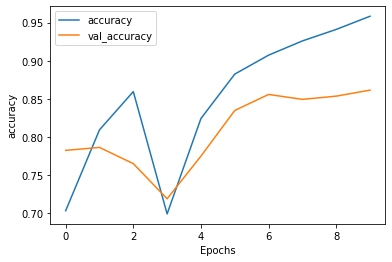

In [11]:
plot_graphs(history, 'accuracy')

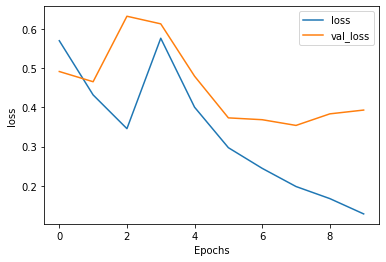

In [12]:
plot_graphs(history, 'loss')